## LHE Kinematics

Simple 1D plots showing some kinematic distributions of A'-> dileptons in the bare LHE file

In [20]:
import math
import numpy
import os
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches
import random as rand
from collections import OrderedDict 
import mplhep as hep
plt.style.use(hep.style.CMS)

Parse input file.
Takes as input log file from running over available mass/coupling parameter space with the following format:

```line format: n_accepted total_events mass eps min_vz max_vz Brem/Eta```

In [14]:
def getType(pdgId):
    if pdgId == 666:
        return 0
    elif pdgId == 13:
        return 1
    elif pdgId == -13:
        return 2
    else:
        return 3

In [15]:
class particle:
    def __init__(self,values):
        self.type = getType(int(values[0]))
        self.e = float(values[4])
        self.px = float(values[5])
        self.py = float(values[6])
        self.pz = float(values[7])
        self.mass = float(values[8])


In [25]:
def parseFile(mass = "2.85"):
    idir = "/seaquest/users/cmantill/DarkQuest/lhe/data/Aprime_Muons/"
    fname = f"SeaQuestAprimeToMuonsLHE_Brem_mAp_{mass}_GeV.txt"
    print("fname", fname)
    filename = f"{idir}/{fname}"
    file = open(filename)
    aprimes = []
    mupluss = []
    muminuss = []
    for l in file.readlines():
        if l.startswith("PDG") or l.startswith("<event>"):
            continue
        spStr = l.split()
        newParticle = particle(spStr)
        if newParticle.type == 0:
            aprimes.append(newParticle)
        elif newParticle.type == 1:
            mupluss.append(newParticle)
        elif newParticle.type == 2:
            muminuss.append(newParticle)
    
    return aprimes, mupluss, muminuss

In [26]:
Aps = OrderedDict()
for mass in [0.25, 0.65, 1.05, 1.45, 1.85, 2.25, 2.65, 3.05]:
    Aps[mass], _, _ = parseFile(str(mass))

fname SeaQuestAprimeToMuonsLHE_Brem_mAp_0.25_GeV.txt
fname SeaQuestAprimeToMuonsLHE_Brem_mAp_0.65_GeV.txt
fname SeaQuestAprimeToMuonsLHE_Brem_mAp_1.05_GeV.txt
fname SeaQuestAprimeToMuonsLHE_Brem_mAp_1.45_GeV.txt
fname SeaQuestAprimeToMuonsLHE_Brem_mAp_1.85_GeV.txt
fname SeaQuestAprimeToMuonsLHE_Brem_mAp_2.25_GeV.txt
fname SeaQuestAprimeToMuonsLHE_Brem_mAp_2.65_GeV.txt
fname SeaQuestAprimeToMuonsLHE_Brem_mAp_3.05_GeV.txt


In [34]:
for mass, aps in Aps.items():
    print(f"mass {mass} events {len(aps)}")

mass 0.25 events 10000
mass 0.65 events 10000
mass 1.05 events 10000
mass 1.45 events 10000
mass 1.85 events 10000
mass 2.25 events 10000
mass 2.65 events 10000
mass 3.05 events 10000


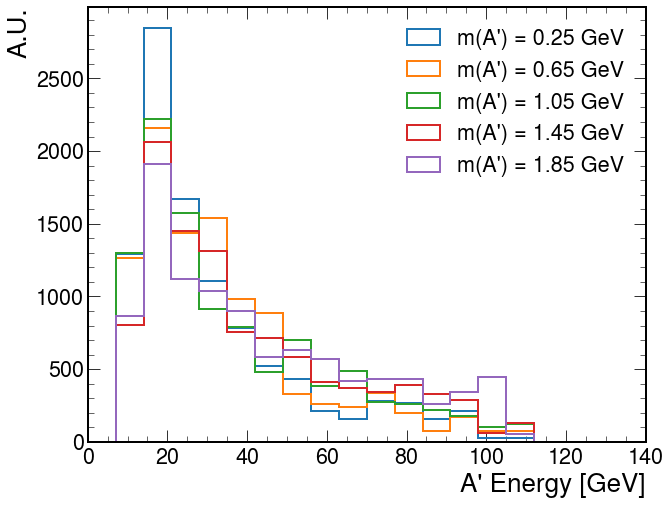

In [39]:
fig = plt.figure(figsize=(10,8))
plt.hist([p.e for p in Aps[0.25]], bins=20, range=(0,140), histtype='step', density=False, linewidth = 2, label = f"m(A') = 0.25 GeV")
plt.hist([p.e for p in Aps[0.65]], bins=20, range=(0,140), histtype='step', density=False, linewidth = 2, label = f"m(A') = 0.65 GeV")
plt.hist([p.e for p in Aps[1.05]], bins=20, range=(0,140), histtype='step', density=False, linewidth = 2, label = f"m(A') = 1.05 GeV")
plt.hist([p.e for p in Aps[1.45]], bins=20, range=(0,140), histtype='step', density=False, linewidth = 2, label = f"m(A') = 1.45 GeV")
plt.hist([p.e for p in Aps[1.85]], bins=20, range=(0,140), histtype='step', density=False, linewidth = 2, label = f"m(A') = 1.85 GeV")

plt.xlim(0,140)
plt.xlabel("A' Energy [GeV]")
plt.ylabel('A.U.')
plt.legend()
#plt.savefig("truth_electron_energy.png")
#plt.ylim(0,8)
#cbar=plt.colorbar()